In [1]:
# Basic Machine learning for forecasting time seriese data
# Short guide from Jason Brownlee
# Provide grid search to optimize the params

# 1. Autoregression (AR)
# 2. Moving Average (MA)
# 3. Autoregressive Moving Average (ARMA)
# 4. Autoregressive Integrated Moving Average (ARIMA)
# 5. Seasonal Autoregressive Integrated Moving-Average (SARIMA)
# 6. Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
# 7. Vector Autoregression (VAR)
# 8. Vector Autoregression Moving-Average (VARMA)
# 9. Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
# 10. Simple Exponential Smoothing (SES)
# 11. Holt Winter’s Exponential Smoothing (HWES)

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# %matplotlib tk
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages



url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)

In [128]:
prediction_length=10
label=df.iloc[100:100+prediction_length]
train=df[:100]
data=train['value']

[ 57  43  55  64  93 104  89  87  57  68  64  61  73  79  80  76  49  59
  55  48  41  49  63  36  42  50  35  41  39  48  31  35  32  36  37  62
  41  51  65  39  56  42  62  46  46  62  41  40  47  48  43  41  55  90
  79  57  43  39  57  56 102  85  79  82  60  47  43  49  60  55  63  57
  61  59  35  69  48  47  44  47  51  54  41  53  49  23  31  38  57  56
  70  57  64  79  65  70  51  43  60  49]


In [4]:
def DisplayOutput(PredictName):
    l=label['value'].tolist()
    datalen=prediction_length*2
    d=data.tail(datalen).tolist()
    y=yhat.tolist()

    plt.plot(d+y,label=PredictName)
    plt.plot(d+l,label='label')

    plt.legend()
    plt.axvline(x=datalen-1,color='r')
    plt.show()
    rmse=np.sqrt(np.mean((np.array(y)-np.array(l))**2))
    print(yhat)
    print('RMSE:{0}'.format(rmse))

/Users/maianhtuan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/Users/maianhtuan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/Users/maianhtuan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


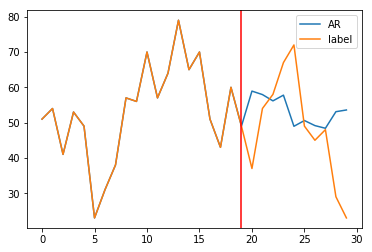

2015-02-27 06:02:53    58.926448
2015-02-27 06:07:53    57.940790
2015-02-27 06:12:53    56.158587
2015-02-27 06:17:53    57.779611
2015-02-27 06:22:53    48.957994
2015-02-27 06:27:53    50.590010
2015-02-27 06:32:53    49.153109
2015-02-27 06:37:53    48.397435
2015-02-27 06:42:53    53.093072
2015-02-27 06:47:53    53.578103
Freq: 5T, dtype: float64
RMSE:16.28210767452176


In [5]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
# data = [x + random() for x in range(1, 100)]

# fit model
model = AR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data)+prediction_length-1)
DisplayOutput('AR')

/Users/maianhtuan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


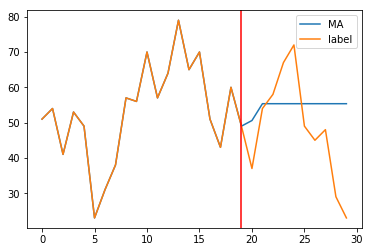

2015-02-27 06:02:53    50.591872
2015-02-27 06:07:53    55.357139
2015-02-27 06:12:53    55.357139
2015-02-27 06:17:53    55.357139
2015-02-27 06:22:53    55.357139
2015-02-27 06:27:53    55.357139
2015-02-27 06:32:53    55.357139
2015-02-27 06:37:53    55.357139
2015-02-27 06:42:53    55.357139
2015-02-27 06:47:53    55.357139
Freq: 5T, dtype: float64
RMSE:15.967469613668689


In [6]:
# MA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
#data = [x + random() for x in range(1, 100)]
# fit model

# HaiMai: The order must be 0 for AR, so it's MA
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data)+prediction_length-1)
DisplayOutput('MA')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15831 entries, 2015-02-26 21:42:53 to 2015-04-22 20:52:53
Data columns (total 1 columns):
value    15831 non-null int64
dtypes: int64(1)
memory usage: 247.4+ KB


/Users/maianhtuan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


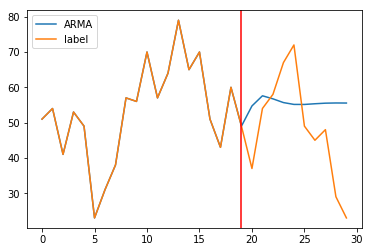

2015-02-27 06:02:53    54.718219
2015-02-27 06:07:53    57.598676
2015-02-27 06:12:53    56.733783
2015-02-27 06:17:53    55.675729
2015-02-27 06:22:53    55.154457
2015-02-27 06:27:53    55.145437
2015-02-27 06:32:53    55.342499
2015-02-27 06:37:53    55.506285
2015-02-27 06:42:53    55.562206
2015-02-27 06:47:53    55.543457
Freq: 5T, dtype: float64
RMSE:16.450549762546604


In [8]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
# data = [random() for x in range(1, 100)]

# fit model
# HaiMai: order for (AR,MA) = (2,1)
model = ARMA(data, order=(2, 3))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data)+prediction_length-1)
DisplayOutput('ARMA')

/Users/maianhtuan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/Users/maianhtuan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


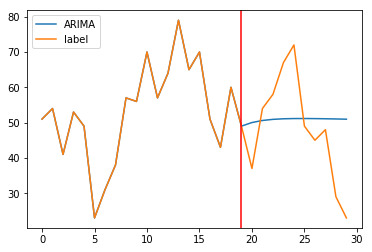

2015-02-27 06:02:53    50.020006
2015-02-27 06:07:53    50.602009
2015-02-27 06:12:53    50.921107
2015-02-27 06:17:53    51.082399
2015-02-27 06:22:53    51.148971
2015-02-27 06:27:53    51.158688
2015-02-27 06:32:53    51.134279
2015-02-27 06:37:53    51.089386
2015-02-27 06:42:53    51.032198
2015-02-27 06:47:53    50.967630
Freq: 5T, dtype: float64
RMSE:14.9624623311613


In [9]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
# data = [x + random() for x in range(1, 100)]
# fit model
# HaiMai: (AR,I,MA)=(1,1,1)
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data)+prediction_length-1, typ='levels')
DisplayOutput('ARIMA')

In [32]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
import itertools

# contrived dataset
# data = [x + random() for x in range(1, 100)]
# fit model
# HaiMai: AR,I,MA = p,d,q; AR,I,MA,Season=P,D,Q,m

p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

minAIC =10000
params =[]
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = SARIMAX(data,
                          order=param,
                          seasonal_order=seasonal_param,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            if results.aic<minAIC:
                minAIC = results.aic
                params =param + seasonal_param
                print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
                
        except Exception as e:
            continue
            
print('Grid Search Done with the best params {0}'.format(params))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1085.8024932648073
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:894.4597387503503
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:798.6887631739216
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:651.1703048735405
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:649.8255506975854
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:626.945339204554
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:615.0152529517819
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:612.349103094258
Grid Search Done with the best params (1, 1, 1, 0, 1, 1, 12)


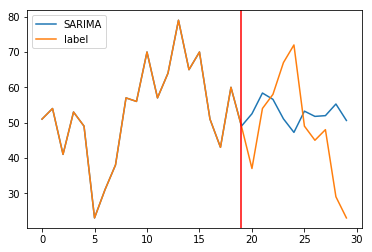

2015-02-27 06:02:53    52.504456
2015-02-27 06:07:53    58.379788
2015-02-27 06:12:53    56.592857
2015-02-27 06:17:53    51.074917
2015-02-27 06:22:53    47.229406
2015-02-27 06:27:53    53.247228
2015-02-27 06:32:53    51.761801
2015-02-27 06:37:53    51.975440
2015-02-27 06:42:53    55.267003
2015-02-27 06:47:53    50.607835
Freq: 5T, dtype: float64
RMSE:16.310899343923804


In [36]:
# HaiMai: Now we predict the future.
model = SARIMAX(data, order=params[:3], seasonal_order=params[3:])
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data)+prediction_length-1)
DisplayOutput('SARIMA')

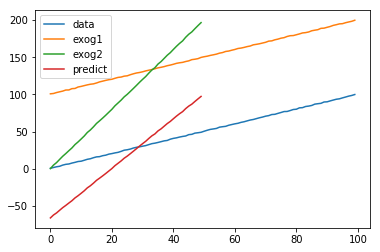

In [89]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data1 = [x + random() for x in range(0, 100)]
data2 = [x + random() for x in range(100, 200)]

# fit model
# HaiMai: Multiple exogenous variables can be defined by exog=np.empty(n,k)
# with n=len(data) and k=features of exogenous, then fill the data into the array.

model = SARIMAX(data1, exog=data2, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# make prediction
exog2 = np.array([x*4 + random() for x in range(50)]);
exog2=exog2.reshape(50,1)

yhat = model_fit.predict(len(data1), len(data1)+49, exog=exog2)
plt.plot(data1,label='data')
plt.plot(data2,label='exog1')
plt.plot(exog2,label='exog2')
plt.plot(yhat,label='predict')
plt.legend()

In [57]:
# HaiMai: Short and Simple Test to make sure SARIMAX setup is working well.
import numpy as np
import statsmodels.api as sm
print(sm.version.version)
np.random.seed(1234)
y = np.random.normal(size=100)
x = np.random.normal(size=100)
mod = sm.tsa.SARIMAX(y, exog=x, order=(1,1,1), trend='ct', seasonal_order=(1,0,0,4))
res = mod.fit()
forecast = res.get_forecast(5, exog=np.random.normal(size=(5,1)))
print(forecast.conf_int())

0.9.0
[[-1.94379057  1.93678949]
 [-2.18564112  1.71422785]
 [-1.83484609  2.078884  ]
 [-2.06447496  1.85482174]
 [-1.94071777  2.00101437]]


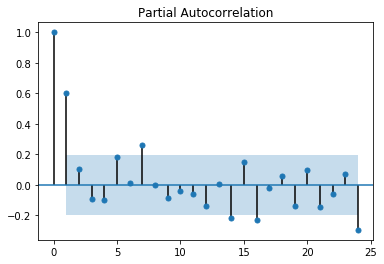

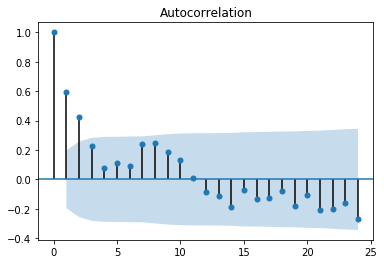

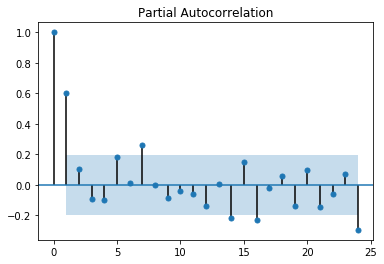

In [13]:
sm.graphics.tsa.plot_acf(data,lags=24)
sm.graphics.tsa.plot_pacf(data,lags=24)

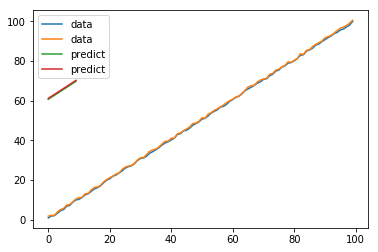

In [74]:
# VAR example
# HaiMai: Multiple time series based on AR
# Here we will make a pair data to train and predict them together.

from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)


# fit model
model = VAR(data)
model_fit = model.fit()
# make prediction
# HaiMai: predict next 10 data from 0->60 dataset.
yhat = model_fit.forecast(data[:60], steps=10)

plt.plot(data,label='data')
plt.plot(yhat,label='predict')
plt.legend()

<class 'statsmodels.tsa.statespace.varmax.VARMAXResultsWrapper'>


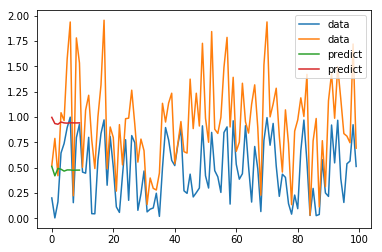

In [85]:
# VARMA example
# HaiMai: Multivarible for time series based on ARMA
# it is the same are ARMA can be used to define VAR or VMA
# Here we will make a pair data to train and predict them together.

from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
    
# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
print(type(model_fit))
# make prediction
yhat = model_fit.forecast(steps=10)

plt.plot(data,label='data')
plt.plot(yhat,label='predict')
plt.legend()

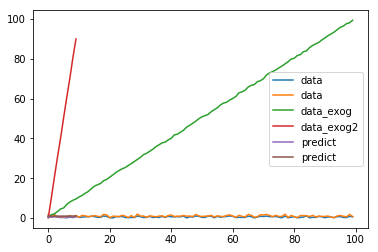

In [111]:
# VARMAX example
# HaiMai: Mutiplevariable for ARMA with Exogenous Regressors.
# It is the same as ARMAX can be used to define VARX or VMAX

from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
    
data_exog = [x + random() for x in range(100)]
# fit model
model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
data_exog2 = np.array([x*10 + random() for x in range(10)]);data_exog2=data_exog2.reshape(10,1)
yhat = model_fit.forecast(exog=data_exog2,steps=10)

plt.plot(data,label='data')
plt.plot(data_exog,label='data_exog')
plt.plot(data_exog2,label='data_exog2')
plt.plot(yhat,label='predict')
plt.legend()

[99.32918244 99.32918244 99.32918244 99.32918244 99.32918244 99.32918244
 99.32918244 99.32918244 99.32918244 99.32918244 99.32918244]


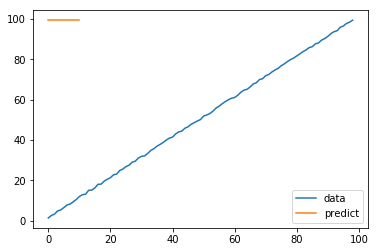

In [114]:
# SES example
# HaiMai: Simple Exponential Smoothing for univariable time series.
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data)+10)
print(yhat)
plt.plot(data,label='data')
plt.plot(yhat,label='predict')
plt.legend()


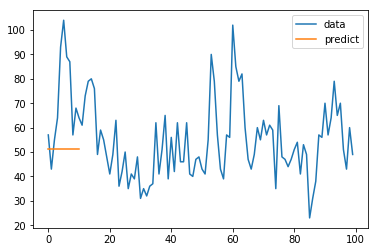

In [147]:
# HWES example
# This method takes trend and seasonal components into account, used for univariable time series.
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
# data = [x + random() for x in range(1, 100)]
# fit model

model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data)+10)

plt.plot(data.values,label='data')
plt.plot(yhat.values,label='predict')
plt.legend()